### Step 1: - Data Import

In [99]:
# Importing the necesary packages
import numpy as np # for easy matrix math function
import tensorflow as tf
import pandas as pd # for easy data loading
import matplotlib.pyplot as plt # to visualize the data
from sklearn.preprocessing import LabelEncoder # for one-hot encoding of the input variables


In [65]:
# Data Import
# 1. Download the csv excel files from the follwoing link (Train & Test)
# https://pjreddie.com/projects/mnist-in-csv/
# 2. Once they are downloaded put them into the same folder as your jupyter notebook
train_df = pd.read_csv('mnist_train.csv', sep = ',', header = None)
test_df = pd.read_csv('mnist_test.csv', sep = ',', header = None)

### Step: 2 - Data Investigation & Vizualization

In [146]:
# lets take a look at the fist five columns of our train dataframe
train_df.head()
# What we can see is that reach row contains the greyvalue data for one image (28x28px)

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [147]:
# lets take a look at the shape of your train dataframe
train_df.shape

# we have 60K images (rows) and 785 columns. Notice: the first column is the label (handwritten digit)
# In order to train our neural network, we only want to feed-in the pixcel (we have to ignore the first column)

(60000, 785)

60000
10
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]] (60000, 10)
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


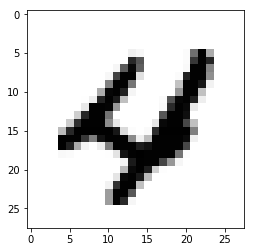

In [151]:
# lets visualize the fist number in our training dataframe
# convert to numpy array
x_train = train_df.values[:, 1:]
# since we use the sigmoid activiation function we need to scale the input values between 0-1
x_train = (np.asfarray(x_train/255.0 * 0.99))+0.01 
#print(np.amax(x_train))


# define and one-hot encode the labels
y_label = train_df[train_df.columns[0]]
# print(y_label)
encoder = LabelEncoder()
encoder.fit(y_label)
y_label = encoder.transform(y_label)

# Define the one-hot encoder
def one_hot_encode(labels):
    num_of_labels = len(labels)
    num_of_unique_labels = len(np.unique(labels))
    #print(num_of_labels)
    #print(num_of_unique_labels)
    one_hot_encode = np.zeros((num_of_labels, num_of_unique_labels))
    one_hot_encode[np.arange(num_of_labels), labels] = 1
    #print(one_hot_encode, one_hot_encode.shape)
    return one_hot_encode

y_label = one_hot_encode(y_label)
#print(y_label)


# Getting a random  row
i = np.random.randint(0,784)
digit = x[i,:]
# reshape into 28x28
digit = digit.reshape((28, 28))
# print the array
plt.imshow(digit, cmap='Greys')
# print(digit)



### Step 3: - Build the Network

[[  1.3814325    1.3039203    2.5172346  ...  -0.01902454 -10.905815
    0.37592757]
 [ -2.4221542    7.1101584    0.9473903  ...   2.2695153   -7.620405
    4.1558037 ]
 [  0.30827653   0.9976258    0.5695847  ...  -6.4595304  -13.579794
   -3.5242183 ]
 ...
 [ -4.653295     4.0997243    5.175024   ...  -9.066843   -12.972731
   -1.054588  ]
 [ -3.201003     6.889128     4.834697   ...  -4.467111    -8.716099
    3.6026795 ]
 [ -2.273826     4.5762777    3.2653916  ...  -1.2209953   -8.525089
   -2.324253  ]] (?, 10)


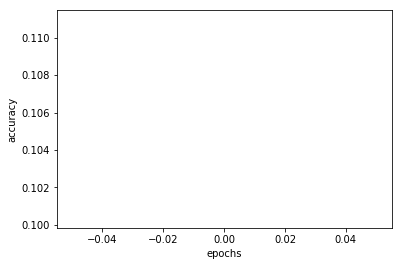

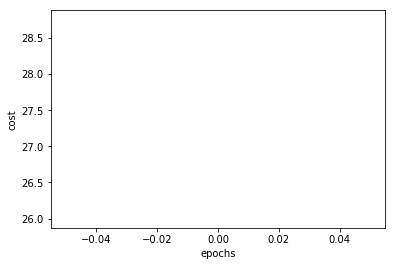

In [160]:
# First we define our hyperparameters
lr = 0.3
epochs = 1
n_dim = x.shape[1] # number of columns in our training dataset (784)
n_class = 10 # since we want to differenciate between 10 digits

# Specifiy the number neurons in the hidden layer
n_hidden_1 = 100

# Definition of the nodes
X = tf.placeholder(tf.float32, [None, n_dim]) # This is neuron input vector (784 columns)
w = tf.Variable(tf.zeros([n_dim, n_class])) # Weight matrix (784 x 10) as varaible since we want to change them
b = tf.Variable(tf.zeros([n_class])) # Biases 10 rows
y = tf.placeholder(tf.float32, [None, n_class]) # the vector containing the label (10 columns)

# Definition of our model as a python function
def my_brain(X, wieghts, biases):
    # connection of the input layer with the hidden layer (sigmoid activation function)
    out_ih = tf.add(tf.matmul(X, weights['w_ih']),biases['b1'])
    out_ih = tf.nn.sigmoid(out_ih)
    
    # connection of the hidden layer with output layer (sigmoid activation function)
    y_pred = tf.add(tf.matmul(out_ih, weights['w_ho']), biases['b2'])
    #y_pred = tf.nn.sigmoid(y_pred)
    
    # return the prediction
    return y_pred


# Define the weights and biases for every layer
weights = {
    'w_ih': tf.Variable(tf.random.truncated_normal([n_dim, n_hidden_1])),
    'w_ho': tf.Variable(tf.random.truncated_normal([n_hidden_1, n_class]))
}

biases = {
    'b1': tf.Variable(tf.random.truncated_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random.truncated_normal([n_class]))
}

# Creating the initializer Object
init = tf.global_variables_initializer()

# call our brain
y_pred = my_brain(X, weights, biases)

# Define the Cost Function and Optimizer
cost_function = tf.losses.mean_squared_error(y, y_pred)
trainer = tf.train.GradientDescentOptimizer(lr).minimize(cost_function)

# Initialize the Variables
with tf.Session() as sess:
    sess.run(init)

    # Training of our model
    
    accuracy_log = []
    cost_log = []

    for epoch in range(epochs):
        sess.run(trainer,feed_dict = {X: x_train, y: y_label})
        cost = sess.run(cost_function, feed_dict = {X: x_train, y: y_label})
        cost_log.append(cost)
        correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.argmax(y, 1)) 
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
        accuracy = sess.run(accuracy, feed_dict = {X: x_train, y: y_label})
        accuracy_log.append(accuracy)
        print(sess.run(y_pred,feed_dict = {X: x_train, y: y_label}), y_pred.shape)
        #print('Epoch: ', epoch, ' - Cost: ', cost, ' - Accuracy: ', accuracy)

# Printing the accuracy KPI
plt.plot(accuracy_log)
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.show()

# Printing the cost KPI
plt.plot(cost_log)
plt.ylabel('cost')
plt.xlabel('epochs')
plt.show()
    